In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator


/Users/saibhargavmandava/.local/share/virtualenvs/bhushan-X14xdfoZ/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [17]:
tf.__version__ 

'2.18.0'

In [36]:
!pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
  Using cached protobuf-5.29.3-cp38-abi3-macosx_10_9_universal2.whl.metadata (592 bytes)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.7/9.7 MB 53.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 731.2/731.2 kB 34.2 MB/s eta 0:00:00
Using cached protobuf-5.29.3-cp38-abi3-macosx_10_9_universal2.whl (417 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 30.7/30.7 MB 80.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 76.2 MB/s eta 0:00:00


In [19]:
import os

folder_path_valid = '/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/valid/labels'
folder_path = '/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/train/labels'

# Lists to store the processed data
output_values = []
output_values_valid = []

# Function to read and process label files
def process_label_files(folder_path):
    output_values = []
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            with open(file_path, 'r') as file:
                content = file.read().strip()
                values = content.split()  # Split the string into individual elements
                try:
                    values = [float(value) for value in values]  # Convert each value to float
                    output_values.append(values)  # Append to the output list
                except ValueError:
                    print(f"Skipping file {filename}, invalid data found.")
    return output_values

# Process the training labels
output_values = process_label_files(folder_path)

# Process the validation labels
output_values_valid = process_label_files(folder_path_valid)

# Print the results
print("length of training ",  len(output_values))
print("length of valid labels:", len(output_values_valid))
y_train=[]
for i in output_values:
    y_train.append(i[0])
print(len(y_train)) 
y_test=[]
for i in output_values_valid:
    y_test.append(i[0])
print(len(y_test))

length of training  878
length of valid labels: 223
878
223


In [20]:

image_filenames =os.listdir('/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/train/images')
print(len(image_filenames))
image_filenames_valid =os.listdir('/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/valid/images')
print(len(image_filenames_valid))

893
223


In [21]:
import os
import shutil

# Paths
image_directory = '/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/train/images'  # Update the image directory path
tumor_directory = '/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/train/tumor'  # Path for tumor images
no_tumor_directory = '/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/train/no_tumor'  # Path for no tumor images

# Assuming y_train is a list/array of binary values where 1 = tumor, 0 = no tumor
# y_train = [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]  # Example binary list; replace with your actual y_train

# Example list of file names (these should match the images in your image directory)
# image_filenames = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg', 'image6.jpg', 'image7.jpg', 'image8.jpg', 'image9.jpg', 'image10.jpg', 'image11.jpg', 'image12.jpg', 'image13.jpg', 'image14.jpg', 'image15.jpg', 'image16.jpg', 'image17.jpg', 'image18.jpg', 'image19.jpg', 'image20.jpg']  # Example image names

# Create the destination directories if they don't exist
os.makedirs(tumor_directory, exist_ok=True)
os.makedirs(no_tumor_directory, exist_ok=True)

# Loop through the binary values in y_train and the corresponding image file names
for label, image_name in zip(y_train, image_filenames):
    # Get the full path of the image file
    image_path = os.path.join(image_directory, image_name)
    
    if label == 1:
        # Move file to tumor directory
        shutil.move(image_path, os.path.join(tumor_directory, image_name))
        print(f'Moved {image_name} to Tumor directory')
    elif label==0:
        # Move file to no_tumor directory
        shutil.move(image_path, os.path.join(no_tumor_directory, image_name))
        print(f'Moved {image_name} to No Tumor directory')
        

print("File organization complete!")


Moved 63.jpg to Tumor directory
Moved 77.jpg to Tumor directory
Moved 00122_8.jpg to No Tumor directory
Moved 00317_26.jpg to Tumor directory
Moved 00364_120.jpg to No Tumor directory
Moved 00063_197.jpg to No Tumor directory
Moved 88.jpg to Tumor directory
Moved 65 (9).jpg to No Tumor directory
Moved 75 (9).jpg to No Tumor directory
Moved 00156_196.jpg to Tumor directory
Moved 00332_147.jpg to Tumor directory
Moved 00322_153.jpg to No Tumor directory
Moved 00322_147.jpg to No Tumor directory
Moved 68 (7).jpg to Tumor directory
Moved 00360_90.jpg to No Tumor directory
Moved 00123_277.jpg to No Tumor directory
Moved 00158_102.jpg to No Tumor directory
Moved 99 (4).jpg to No Tumor directory
Moved 89 (4).jpg to No Tumor directory
Moved 00360_114.jpg to Tumor directory
Moved 00078_278.jpg to No Tumor directory
Moved 00195_225.jpg to Tumor directory
Moved 00245_101.jpg to Tumor directory
Moved 00263_117.jpg to No Tumor directory
Moved 00273_103.jpg to Tumor directory
Moved 00074_289.jpg to 

In [22]:
import os
import shutil

# Paths
image_directory = '/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/valid/images'  # Update the image directory path
tumor_directory = '/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/valid/tumor'  # Path for tumor images
no_tumor_directory = '/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/valid/no_tumor'  # Path for no tumor images

# Assuming y_train is a list/array of binary values where 1 = tumor, 0 = no tumor
# y_train = [1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1]  # Example binary list; replace with your actual y_train

# Example list of file names (these should match the images in your image directory)
# image_filenames = ['image1.jpg', 'image2.jpg', 'image3.jpg', 'image4.jpg', 'image5.jpg', 'image6.jpg', 'image7.jpg', 'image8.jpg', 'image9.jpg', 'image10.jpg', 'image11.jpg', 'image12.jpg', 'image13.jpg', 'image14.jpg', 'image15.jpg', 'image16.jpg', 'image17.jpg', 'image18.jpg', 'image19.jpg', 'image20.jpg']  # Example image names

# Create the destination directories if they don't exist
os.makedirs(tumor_directory, exist_ok=True)
os.makedirs(no_tumor_directory, exist_ok=True)

# Loop through the binary values in y_train and the corresponding image file names
for label, image_name in zip(y_test, image_filenames_valid):
    # Get the full path of the image file
    image_path = os.path.join(image_directory, image_name)
    
    if label == 1:
        # Move file to tumor directory
        shutil.move(image_path, os.path.join(tumor_directory, image_name))
        print(f'Moved {image_name} to Tumor directory')
    elif label==0:
        # Move file to no_tumor directory
        shutil.move(image_path, os.path.join(no_tumor_directory, image_name))
        print(f'Moved {image_name} to No Tumor directory')

print("File organization complete!")


Moved val_1 (144).jpg to No Tumor directory
Moved val_1 (87).jpg to Tumor directory
Moved val_1 (113).jpg to No Tumor directory
Moved val_1 (68).jpg to No Tumor directory
Moved val_1 (105).jpg to No Tumor directory
Moved val_1 (91).jpg to Tumor directory
Moved val_1 (152).jpg to Tumor directory
Moved val_1 (29).jpg to No Tumor directory
Moved val_1 (52).jpg to Tumor directory
Moved val_1 (129).jpg to No Tumor directory
Moved val_1 (200).jpg to Tumor directory
Moved val_1 (191).jpg to No Tumor directory
Moved val_1 (187).jpg to Tumor directory
Moved val_1 (13).jpg to No Tumor directory
Moved val_1 (168).jpg to Tumor directory
Moved val_1 (44).jpg to No Tumor directory
Moved val_1 (216).jpg to No Tumor directory
Moved val_1 (148).jpg to No Tumor directory
Moved val_1 (33).jpg to No Tumor directory
Moved val_1 (64).jpg to Tumor directory
Moved val_1 (220).jpg to No Tumor directory
Moved val_1 (109).jpg to Tumor directory
Moved val_1 (72).jpg to Tumor directory
Moved val_1 (25).jpg to No T

In [5]:
import torch,torchvision
import torch.nn as nn
import torch.optim as optim
import torchvision.transforms as transforms
from torch.utils.data import DataLoader,Dataset
from torchvision import models
from torch.optim import lr_scheduler

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import time
from PIL import Image
from tempfile import TemporaryFile

In [7]:
from torchvision import datasets, transforms
import os


In [23]:
dataset_path ='/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor'
data_transforms ={
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  
    ]),
    'valid': transforms.Compose([
       transforms.Resize(256),
         transforms.CenterCrop(224),    
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
}
image_datasets ={
    x: datasets.ImageFolder(os.path.join(dataset_path,x),data_transforms[x]) for x in ['train','valid']
}
image_loader ={
    x: torch.utils.data.DataLoader(image_datasets[x],batch_size=32,shuffle=True,num_workers=4) for x in ['train','valid']
}
data_sizes = {x: len(image_datasets[x]) for x in ['train','valid']}
class_names = image_datasets['train'].classes

In [9]:
print(data_sizes['train'],data_sizes['valid'])
print(class_names)

878 223
['no_tumor', 'tumor']


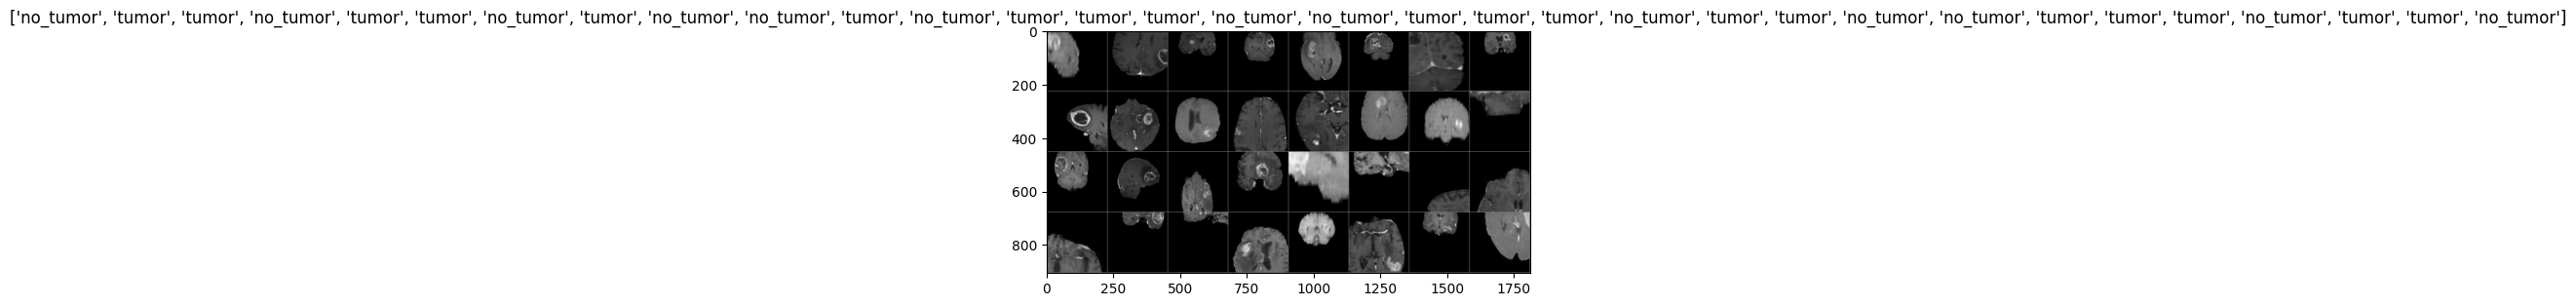

In [10]:
def imshow(inp,title=None):
    inp=inp.numpy().transpose((1,2,0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)
inputs, classes = next(iter(image_loader['train']))

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

In [11]:
device  = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else 'cpu'
print(f"using device {device}")

using device mps


In [12]:
from tempfile import TemporaryDirectory


In [13]:
def train_model(model,criterion,optimizer,scheduler,num_epochs=25):
    since = time.time()
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')
        torch.save(model.state_dict(), best_model_params_path)
        best_acc=0
        for epoch in range(num_epochs):
            print(f"epoch {epoch}/{num_epochs-1}")  
            for phase in ['train','valid']:
                if phase == 'train':
                    model.train()
                else:
                    model.eval()
                running_loss = 0.0
                running_corrects = 0
                for inputs,labels in image_loader[phase]:
                    inputs =inputs.to(device)
                    labels =labels.to(device)
                    optimizer.zero_grad()
                    with torch.set_grad_enabled(phase =='train'):
                        outputs=model(inputs)
                        _,preds=torch.max(outputs,1)
                        loss = criterion(outputs,labels)
                        if phase == 'train':
                            loss.backward()
                            optimizer.step()
                        running_corrects += torch.sum(preds == labels.data)
                        running_loss += loss.item() * inputs.size(0)
                epoch_loss = running_loss / data_sizes[phase]
                epoch_acc = running_corrects.float() / data_sizes[phase]
                print(f"{phase} loss: {epoch_loss} acc: {epoch_acc}")
                if phase == 'train':
                    scheduler.step()
                if phase == 'valid' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)
                    print(f"model saved to {best_model_params_path}")
            
        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60}m {time_elapsed % 60}s')
        print(f'Best val acc: {best_acc}')
        model.load_state_dict(torch.load(best_model_params_path))       
    return model


In [14]:
def visualize_model(model, num_images=10):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()
    with torch.no_grad():
        for i,(inputs,labels) in enumerate(image_loader['valid']):
            inputs =inputs.to(device)
            labels =labels.to(device)
            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title(f'predicted: {class_names[preds[j]]} | actual: {class_names[labels[j]]}')
                imshow(inputs.cpu().data[j])
                if images_so_far == num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [15]:
model_ft =models.resnet18(pretrained=True)
num_ftrs=model_ft.fc.in_features
model_ft.fc=nn.Linear(num_ftrs,2)
model_ft =model_ft.to(device)
criterion = nn.CrossEntropyLoss()
optimizer_ft = optim.SGD(model_ft.parameters(),lr=0.001,momentum=0.9)
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft,step_size=7,gamma=0.1)

/Users/saibhargavmandava/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/saibhargavmandava/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [35]:
model_ft = train_model(model_ft,criterion,optimizer_ft,exp_lr_scheduler,num_epochs=25)

epoch 0/24
train loss: 0.7501918415545331 acc: 0.5136674046516418
valid loss: 0.6656302929993703 acc: 0.6367713212966919
model saved to /var/folders/ql/3tw0kktx5ss3d1hp5wyblcsc0000gn/T/tmpi14avcu6/best_model_params.pt
epoch 1/24
train loss: 0.7227627273844152 acc: 0.5284737944602966
valid loss: 0.7075381417980109 acc: 0.48878923058509827
epoch 2/24
train loss: 0.7260672262697937 acc: 0.5113894939422607
valid loss: 0.7264222973130744 acc: 0.4529148042201996
epoch 3/24
train loss: 0.6972813727100781 acc: 0.5466970205307007
valid loss: 0.7986036827745994 acc: 0.4170403480529785
epoch 4/24
train loss: 0.7081757660335724 acc: 0.5170843005180359
valid loss: 0.6907173050358691 acc: 0.5874439477920532
epoch 5/24
train loss: 0.7027652756499809 acc: 0.5353075265884399
valid loss: 0.7275520311877332 acc: 0.4932735562324524
epoch 6/24
train loss: 0.7155840585606517 acc: 0.5546696782112122
valid loss: 0.7015802967174171 acc: 0.5381165742874146
epoch 7/24
train loss: 0.6757564518880735 acc: 0.594533

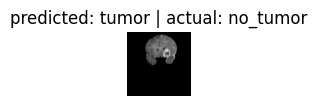

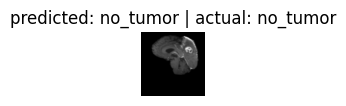

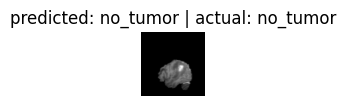

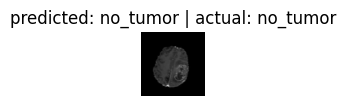

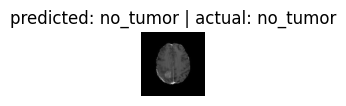

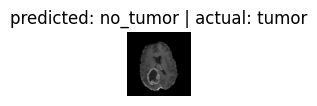

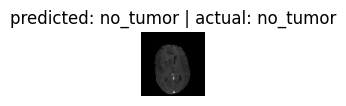

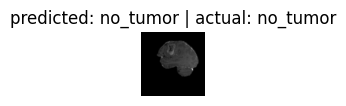

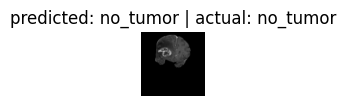

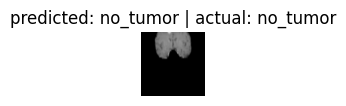

In [41]:
visualize_model(model_ft)

In [31]:
model_conv = torchvision.models.resnet18(pretrained=True)
for param in model_conv.parameters():
    param.requires_grad = False

# Parameters of newly constructed modules have requires_grad=True by default
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 2)

model_conv = model_conv.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that only parameters of final layer are being optimized as
# opposed to before.
optimizer_conv = optim.Adam(model_conv.fc.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
# exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)

/Users/saibhargavmandava/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/saibhargavmandava/Library/Python/3.9/lib/python/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [32]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

epoch 0/24
train loss: 0.7077804283835079 acc: 0.5318906903266907
valid loss: 0.806022418454089 acc: 0.3991031348705292
model saved to /var/folders/ql/3tw0kktx5ss3d1hp5wyblcsc0000gn/T/tmp1yr4y2ci/best_model_params.pt
epoch 1/24
train loss: 0.7138149049939219 acc: 0.5239179730415344
valid loss: 0.7665630696600328 acc: 0.4125560522079468
model saved to /var/folders/ql/3tw0kktx5ss3d1hp5wyblcsc0000gn/T/tmp1yr4y2ci/best_model_params.pt
epoch 2/24
train loss: 0.7089057177780429 acc: 0.5318906903266907
valid loss: 0.8067017660012694 acc: 0.37219730019569397
epoch 3/24
train loss: 0.710382691412689 acc: 0.5136674046516418
valid loss: 0.7246308692902192 acc: 0.4663677215576172
model saved to /var/folders/ql/3tw0kktx5ss3d1hp5wyblcsc0000gn/T/tmp1yr4y2ci/best_model_params.pt
epoch 4/24
train loss: 0.7111410952103165 acc: 0.5307517051696777
valid loss: 0.7252467576698337 acc: 0.4708520174026489
model saved to /var/folders/ql/3tw0kktx5ss3d1hp5wyblcsc0000gn/T/tmp1yr4y2ci/best_model_params.pt
epoch 5/

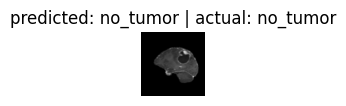

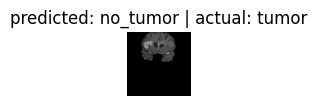

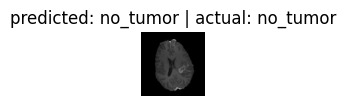

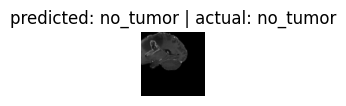

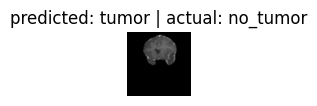

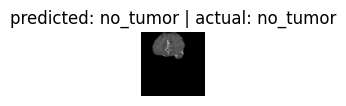

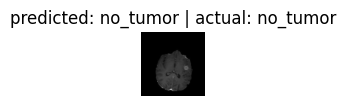

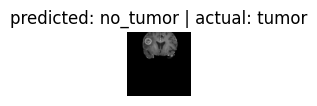

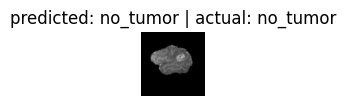

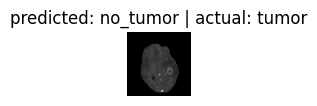

In [42]:
visualize_model(model_conv)

plt.ioff()
plt.show()

In [45]:
!pip install sklearn
!pip install scikit-learn
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py) ... error
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to 

In [27]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

def plot_confusion_matrix(model, image_loader, class_names, device):
    model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for inputs, labels in image_loader:  # ✅ Correct way inside the function

            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)

            all_preds.extend(preds.cpu().numpy())  # Collect predictions
            all_labels.extend(labels.cpu().numpy())  # Collect actual labels

    if not all_labels:  # Check if all_labels is still empty
        raise ValueError("No labels collected! Check if image_loader['valid'] is loading data properly.")

    # Compute Confusion Matrix
    cm = confusion_matrix(all_labels, all_preds)
    
    # Plot Confusion Matrix
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title('Confusion Matrix')
    plt.show()

    # Additional Metrics
    f1 = f1_score(all_labels, all_preds, average='weighted')
    accuracy = accuracy_score(all_labels, all_preds)
    precision = precision_score(all_labels, all_preds, average='weighted')
    recall = recall_score(all_labels, all_preds, average='weighted')

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-Score: {f1:.4f}")

    return all_labels, all_preds  # Return for further analysis


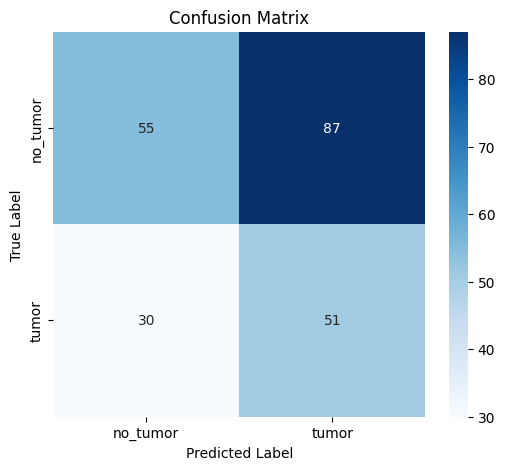

Accuracy: 0.4753
Precision: 0.5463
Recall: 0.4753
F1-Score: 0.4777


([np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64(0),
  np.int64(1),
  np.int64(1),
  np.int64(0),
  np.int64(0),
  np.int64

In [28]:
image_loader_valid = image_loader['valid']  # Ensure 'valid' exists
plot_confusion_matrix(model_ft, image_loader_valid, class_names, device)


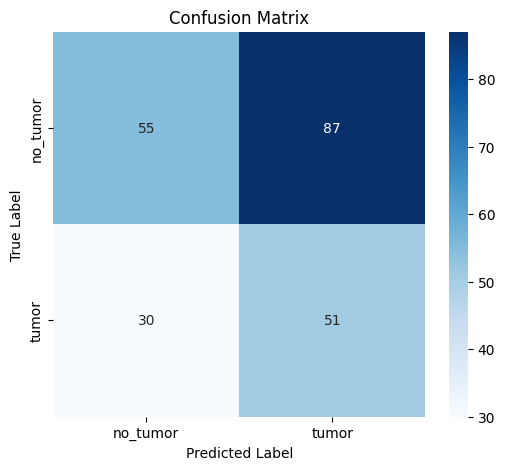

Accuracy: 0.4753
Precision: 0.5463
Recall: 0.4753
F1-Score: 0.4777
Final Accuracy: 0.4753
Final Precision: 0.5463
Final Recall: 0.4753
Final F1-Score: 0.4777


In [29]:
all_labels, all_preds = plot_confusion_matrix(model_ft, image_loader['valid'], class_names, device)

# Compute Metrics
f1 = f1_score(all_labels, all_preds, average='weighted')
accuracy = accuracy_score(all_labels, all_preds)
precision = precision_score(all_labels, all_preds, average='weighted')
recall = recall_score(all_labels, all_preds, average='weighted')

print(f"Final Accuracy: {accuracy:.4f}")
print(f"Final Precision: {precision:.4f}")
print(f"Final Recall: {recall:.4f}")
print(f"Final F1-Score: {f1:.4f}")


In [34]:
#inference
def visualize_model_predictions(model,image_path):
    was_training =model.training  
    model.eval()
    img =Image.open(image_path)
    img = image_datasets['valid'].transform(img)  # ✅ Correct
    img =img.unsqueeze(0)
    img =img.to(device) 
    with torch.no_grad():
        outputs =model(img)
        _,preds =torch.max(outputs, 1)
        ax =plt.subplot(2,2,1)
        ax.axis('off')
        ax.set_title(f'predicted: {class_names[preds[0]]}')
        imshow(img.cpu().data[0])
        model.train(mode=was_training)
    


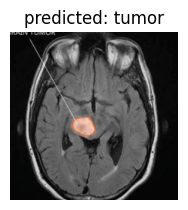

In [35]:
visualize_model_predictions(
    model_ft,
    image_path='/Users/saibhargavmandava/Documents/bhushanGit/SDS-CP024-neurovision/submissions-team/bhushan/brain tumor/brain-tumor/inferance_images/Midline Glioma (Article).jpg'
)

plt.ioff()
plt.show()

In [41]:
import streamlit as st

In [40]:
input_data = st.file_uploader("Upload MRI Image", type=["jpg", "jpeg", "png"])

if input_data is not None:
    mri_image = st.image(input_data)  # ✅ Pass the uploaded image to st.image()
input_data = st.file_uploader("Upload MRI Image", type=["jpg", "jpeg", "png"])
if input_data is not None:
    mri_image.image(input_data)
    visualize_model_predictions(model_ft, input_data)
    plt.ioff()
    plt.show()

2025-03-12 11:53:28.132 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 11:53:28.133 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 11:53:28.135 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 11:53:28.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 11:53:28.137 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 11:53:28.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 11:53:28.138 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-12 11:53:28.139 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar